<a href="https://colab.research.google.com/github/Kim-Yeon-Jun/Dacon/blob/main/DataAnalysis_Daegu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import time
plt.rc('font', family='NanumBarunGothic')

In [131]:
train = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/test.csv")

In [80]:
#모든 열에 대한 원핫인코딩
# sample = pd.concat([train, pd.get_dummies(train.iloc[:, 0:18]).astype(int)], axis=1)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
dtypes: object(8)
memory usage: 685.3+ KB


In [83]:
sample = train[['법규위반','ECLO']].copy()

In [84]:
sample.head()

,법규위반,ECLO
0,안전운전불이행,5
1,기타,3
2,안전운전불이행,3
3,안전운전불이행,5
4,안전운전불이행,3


In [85]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   법규위반    39609 non-null  object
 1   ECLO    39609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 619.0+ KB


In [86]:
sample = pd.concat([sample, pd.get_dummies(sample.iloc[:, 0]).astype(int)], axis=1)

In [87]:
sample.head()

,법규위반,ECLO,과속,교차로운행방법위반,기타,보행자보호의무위반,불법유턴,신호위반,안전거리미확보,안전운전불이행,중앙선침범,직진우회전진행방해,차로위반
0,안전운전불이행,5,0,0,0,0,0,0,0,1,0,0,0
1,기타,3,0,0,1,0,0,0,0,0,0,0,0
2,안전운전불이행,3,0,0,0,0,0,0,0,1,0,0,0
3,안전운전불이행,5,0,0,0,0,0,0,0,1,0,0,0
4,안전운전불이행,3,0,0,0,0,0,0,0,1,0,0,0


In [88]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   법규위반       39609 non-null  object
 1   ECLO       39609 non-null  int64 
 2   과속         39609 non-null  int64 
 3   교차로운행방법위반  39609 non-null  int64 
 4   기타         39609 non-null  int64 
 5   보행자보호의무위반  39609 non-null  int64 
 6   불법유턴       39609 non-null  int64 
 7   신호위반       39609 non-null  int64 
 8   안전거리미확보    39609 non-null  int64 
 9   안전운전불이행    39609 non-null  int64 
 10  중앙선침범      39609 non-null  int64 
 11  직진우회전진행방해  39609 non-null  int64 
 12  차로위반       39609 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.9+ MB


<ipython-input-89-2b7fd58c0b51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample.corr())
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


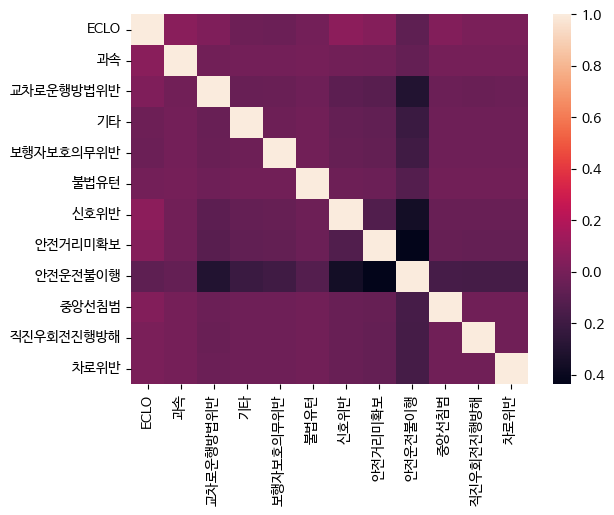

In [89]:
sns.heatmap(sample.corr())

In [90]:
sample.corr() > 0

<ipython-input-90-3c68daaf464f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample.corr() > 0


,ECLO,과속,교차로운행방법위반,기타,보행자보호의무위반,불법유턴,신호위반,안전거리미확보,안전운전불이행,중앙선침범,직진우회전진행방해,차로위반
ECLO,True,True,True,False,False,False,True,True,False,True,True,True
과속,True,True,False,False,False,False,False,False,False,False,False,False
교차로운행방법위반,True,False,True,False,False,False,False,False,False,False,False,False
기타,False,False,False,True,False,False,False,False,False,False,False,False
보행자보호의무위반,False,False,False,False,True,False,False,False,False,False,False,False
불법유턴,False,False,False,False,False,True,False,False,False,False,False,False
신호위반,True,False,False,False,False,False,True,False,False,False,False,False
안전거리미확보,True,False,False,False,False,False,False,True,False,False,False,False
안전운전불이행,False,False,False,False,False,False,False,False,True,False,False,False
중앙선침범,True,False,False,False,False,False,False,False,False,True,False,False


In [91]:
df = train[['사고일시','요일','기상상태','시군구','도로형태','노면상태','사고유형','ECLO']].copy()

In [92]:
df.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,5
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,3


In [93]:
sample2 = train[['도로형태','ECLO']].copy()

In [94]:
sample2 = pd.concat([sample2, pd.get_dummies(sample2.iloc[:, 0]).astype(int)], axis=1)

In [95]:
sample2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   도로형태             39609 non-null  object
 1   ECLO             39609 non-null  int64 
 2   교차로 - 교차로부근      39609 non-null  int64 
 3   교차로 - 교차로안       39609 non-null  int64 
 4   교차로 - 교차로횡단보도내   39609 non-null  int64 
 5   기타 - 기타          39609 non-null  int64 
 6   단일로 - 고가도로위      39609 non-null  int64 
 7   단일로 - 교량         39609 non-null  int64 
 8   단일로 - 기타         39609 non-null  int64 
 9   단일로 - 지하차도(도로)내  39609 non-null  int64 
 10  단일로 - 터널         39609 non-null  int64 
 11  미분류 - 미분류        39609 non-null  int64 
 12  주차장 - 주차장        39609 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.9+ MB


<ipython-input-96-77a072424d1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample2.corr())
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


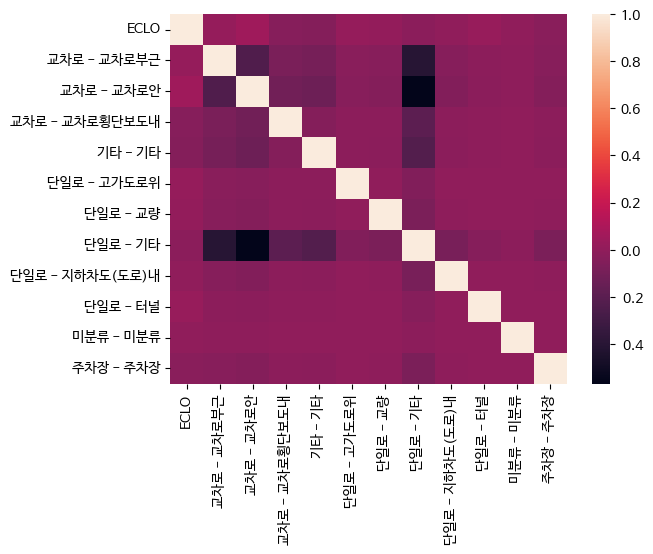

In [96]:
sns.heatmap(sample2.corr())

In [97]:
sample2.corr() > 0

<ipython-input-97-ee9db5494856>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample2.corr() > 0


,ECLO,교차로 - 교차로부근,교차로 - 교차로안,교차로 - 교차로횡단보도내,기타 - 기타,단일로 - 고가도로위,단일로 - 교량,단일로 - 기타,단일로 - 지하차도(도로)내,단일로 - 터널,미분류 - 미분류,주차장 - 주차장
ECLO,True,True,True,False,False,True,True,False,False,True,False,False
교차로 - 교차로부근,True,True,False,False,False,False,False,False,False,False,False,False
교차로 - 교차로안,True,False,True,False,False,False,False,False,False,False,False,False
교차로 - 교차로횡단보도내,False,False,False,True,False,False,False,False,False,False,False,False
기타 - 기타,False,False,False,False,True,False,False,False,False,False,False,False
단일로 - 고가도로위,True,False,False,False,False,True,False,False,False,False,False,False
단일로 - 교량,True,False,False,False,False,False,True,False,False,False,False,False
단일로 - 기타,False,False,False,False,False,False,False,True,False,False,False,False
단일로 - 지하차도(도로)내,False,False,False,False,False,False,False,False,True,False,False,False
단일로 - 터널,True,False,False,False,False,False,False,False,False,True,False,False


In [98]:
sample2.columns

Index(['도로형태', 'ECLO', '교차로 - 교차로부근', '교차로 - 교차로안', '교차로 - 교차로횡단보도내',
       '기타 - 기타', '단일로 - 고가도로위', '단일로 - 교량', '단일로 - 기타', '단일로 - 지하차도(도로)내',
       '단일로 - 터널', '미분류 - 미분류', '주차장 - 주차장'],
      dtype='object')

In [25]:
sample3 = train[['요일','ECLO']].copy()
sample3 = pd.concat([sample3, pd.get_dummies(sample3.iloc[:, 0]).astype(int)], axis=1)

<ipython-input-26-12f8d008b1b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample3.corr())


<Axes: >

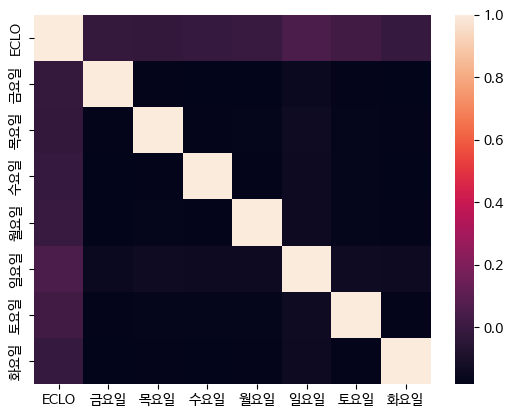

In [26]:
sns.heatmap(sample3.corr())

In [27]:
sample3.corr() > 0

<ipython-input-27-84a62e2a081a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample3.corr() > 0


,ECLO,금요일,목요일,수요일,월요일,일요일,토요일,화요일
ECLO,True,False,False,False,False,True,True,False
금요일,False,True,False,False,False,False,False,False
목요일,False,False,True,False,False,False,False,False
수요일,False,False,False,True,False,False,False,False
월요일,False,False,False,False,True,False,False,False
일요일,True,False,False,False,False,True,False,False
토요일,True,False,False,False,False,False,True,False
화요일,False,False,False,False,False,False,False,True


In [68]:
sample3.columns

Index(['요일', 'ECLO', '금요일', '목요일', '수요일', '월요일', '일요일', '토요일', '화요일'], dtype='object')

In [28]:
sample4 = train[['시군구','ECLO']].copy()
sample4 = pd.concat([sample4, pd.get_dummies(sample4.iloc[:, 0]).astype(int)], axis=1)

In [29]:
sample4.corr()>0

<ipython-input-29-2b7e2029a596>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample4.corr()>0


,ECLO,대구광역시 남구 대명동,대구광역시 남구 봉덕동,대구광역시 남구 이천동,대구광역시 달서구 갈산동,대구광역시 달서구 감삼동,대구광역시 달서구 대곡동,대구광역시 달서구 대천동,대구광역시 달서구 도원동,대구광역시 달서구 두류동,...,대구광역시 중구 전동,대구광역시 중구 종로1가,대구광역시 중구 종로2가,대구광역시 중구 태평로1가,대구광역시 중구 태평로2가,대구광역시 중구 태평로3가,대구광역시 중구 포정동,대구광역시 중구 하서동,대구광역시 중구 향촌동,대구광역시 중구 화전동
ECLO,True,False,True,False,True,True,True,True,False,False,...,False,False,False,False,True,True,False,True,False,False
대구광역시 남구 대명동,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
대구광역시 남구 봉덕동,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
대구광역시 남구 이천동,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
대구광역시 달서구 갈산동,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
대구광역시 중구 태평로3가,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
대구광역시 중구 포정동,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
대구광역시 중구 하서동,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
대구광역시 중구 향촌동,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [30]:
sample5 = train[['노면상태','사망자수','중상자수','경상자수','부상자수']].copy()

In [31]:
sample5 = pd.concat([sample5, pd.get_dummies(sample5.iloc[:, 0]).astype(int)], axis=1)

In [32]:
sample5.corr()

<ipython-input-32-f19dfeb56a1a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample5.corr()


,사망자수,중상자수,경상자수,부상자수,건조,기타,서리/결빙,적설,젖음/습기,침수
사망자수,1.000000,-0.004368,-0.060607,-0.022771,-0.015655,0.011350,-0.002169,-0.000751,0.013451,0.031444
중상자수,-0.004368,1.000000,-0.325585,-0.105167,-0.018771,0.006305,-0.001122,-0.004559,0.018518,-0.004559
경상자수,-0.060607,-0.325585,1.000000,-0.165157,0.004724,-0.016682,-0.004815,-0.000615,-0.001825,-0.003539
부상자수,-0.022771,-0.105167,-0.165157,1.000000,0.000840,-0.002272,0.012298,-0.002798,-0.001734,0.004553
건조,-0.015655,-0.018771,0.004724,0.000840,1.000000,-0.129413,-0.084928,-0.029412,-0.984745,-0.029412
기타,0.011350,0.006305,-0.016682,-0.002272,-0.129413,1.000000,-0.000962,-0.000333,-0.011159,-0.000333
서리/결빙,-0.002169,-0.001122,-0.004815,0.012298,-0.084928,-0.000962,1.000000,-0.000219,-0.007323,-0.000219
적설,-0.000751,-0.004559,-0.000615,-0.002798,-0.029412,-0.000333,-0.000219,1.000000,-0.002536,-0.000076
젖음/습기,0.013451,0.018518,-0.001825,-0.001734,-0.984745,-0.011159,-0.007323,-0.002536,1.000000,-0.002536
침수,0.031444,-0.004559,-0.003539,0.004553,-0.029412,-0.000333,-0.000219,-0.000076,-0.002536,1.000000


In [74]:
sample5.columns

Index(['노면상태', '사망자수', '중상자수', '경상자수', '부상자수', '건조', '기타', '서리/결빙', '적설',
       '젖음/습기', '침수'],
      dtype='object')

In [33]:
sample6 = train[['사고유형','사망자수','중상자수','경상자수','부상자수']].copy()

In [34]:
sample6 = pd.concat([sample6, pd.get_dummies(sample6.iloc[:, 0]).astype(int)], axis=1)

In [35]:
sample6.corr()

<ipython-input-35-2075791fdca0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample6.corr()


,사망자수,중상자수,경상자수,부상자수,차대사람,차대차,차량단독
사망자수,1.000000,-0.004368,-0.060607,-0.022771,0.053294,-0.077524,0.068696
중상자수,-0.004368,1.000000,-0.325585,-0.105167,0.094229,-0.098664,0.023560
경상자수,-0.060607,-0.325585,1.000000,-0.165157,-0.230630,0.252835,-0.086599
부상자수,-0.022771,-0.105167,-0.165157,1.000000,-0.032147,0.009254,0.054178
차대사람,0.053294,0.094229,-0.230630,-0.032147,1.000000,-0.920289,-0.073142
차대차,-0.077524,-0.098664,0.252835,0.009254,-0.920289,1.000000,-0.322878
차량단독,0.068696,0.023560,-0.086599,0.054178,-0.073142,-0.322878,1.000000


In [75]:
sample7 = train[['기상상태','ECLO']].copy()
sample7 = pd.concat([sample7, pd.get_dummies(sample7.iloc[:,0]).astype(int)], axis=1)
sample7.corr()

<ipython-input-75-65f09aa6edb6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample7.corr()


,ECLO,기타,눈,맑음,비,안개,흐림
ECLO,1.000000,0.002578,-0.000451,-0.013995,0.014044,0.003427,0.002239
기타,0.002578,1.000000,-0.000535,-0.122243,-0.010029,-0.000535,-0.005152
눈,-0.000451,-0.000535,1.000000,-0.046176,-0.003788,-0.000202,-0.001946
맑음,-0.013995,-0.122243,-0.046176,1.000000,-0.865874,-0.046176,-0.444857
비,0.014044,-0.010029,-0.003788,-0.865874,1.000000,-0.003788,-0.036495
안개,0.003427,-0.000535,-0.000202,-0.046176,-0.003788,1.000000,-0.001946
흐림,0.002239,-0.005152,-0.001946,-0.444857,-0.036495,-0.001946,1.000000


In [76]:
sample7.columns

Index(['기상상태', 'ECLO', '기타', '눈', '맑음', '비', '안개', '흐림'], dtype='object')

In [132]:
rf_train = train[['사고일시','요일','기상상태','시군구','도로형태','노면상태','사고유형']].copy()
rf_test = test[['사고일시','요일','기상상태','시군구','도로형태','노면상태','사고유형']].copy()

In [37]:
# location_pattern = r'(\S+) (\S+) (\S+)'

# rf_train[['도시', '구', '동']] = train['시군구'].str.extract(location_pattern)
# rf_train = rf_train.drop(columns=['시군구'])

# rf_test[['도시', '구', '동']] = test['시군구'].str.extract(location_pattern)
# rf_test = rf_test.drop(columns=['시군구'])

# time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

# rf_train[['연', '월', '일', '시간']] = train['사고일시'].str.extract(time_pattern)
# rf_train[['연', '월', '일', '시간']] = rf_train[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
# rf_train = rf_train.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# # 해당 과정을 test_x에 대해서도 반복해줍니다
# rf_test[['연', '월', '일', '시간']] = test['사고일시'].str.extract(time_pattern)
# rf_test[['연', '월', '일', '시간']] = rf_test[['연', '월', '일', '시간']].apply(pd.to_numeric)
# rf_test = rf_test.drop(columns=['사고일시'])

In [39]:
# from sklearn.preprocessing import LabelEncoder

# categorical_features = list(rf_train.dtypes[rf_train.dtypes == "object"].index)
# # 추출된 문자열 변수 확인
# display(categorical_features)

['요일', '기상상태', '도로형태', '노면상태', '사고유형', '도시', '구', '동']

In [40]:
# for i in categorical_features:
#     le = LabelEncoder()
#     le=le.fit(rf_train[i])
#     rf_train[i]=le.transform(rf_train[i])

#     for case in np.unique(rf_test[i]):
#         if case not in le.classes_:
#             le.classes_ = np.append(le.classes_, case)
#     rf_test[i]=le.transform(rf_test[i])

In [41]:
rf_train.head()

,요일,기상상태,도로형태,노면상태,사고유형,도시,구,동,연,월,일,시간
0,6,2,6,0,0,0,7,40,2019,1,1,0
1,6,5,6,0,0,0,1,4,2019,1,1,0
2,6,2,6,0,0,0,6,66,2019,1,1,1
3,6,2,6,0,1,0,4,79,2019,1,1,2
4,6,2,6,0,1,0,3,129,2019,1,1,4


In [42]:
rf_test.head()

,요일,기상상태,도로형태,노면상태,사고유형,도시,구,동,연,월,일,시간
0,5,2,1,0,0,0,6,99,2022,1,1,1
1,5,2,6,0,0,0,6,168,2022,1,1,1
2,5,2,1,0,1,0,6,117,2022,1,1,4
3,5,2,6,0,1,0,6,126,2022,1,1,4
4,5,2,1,0,1,0,1,4,2022,1,1,6


In [43]:
rf_train.to_csv('/content/drive/MyDrive/Dacon/Daegu_accident/rf_train.csv', index=False)
rf_test.to_csv('/content/drive/MyDrive/Dacon/Daegu_accident/rf_test.csv', index=False)

## 상관관계 + : 1, - : -1로 라벨링

In [273]:
corr_train = train[['사고일시','요일','기상상태','시군구','도로형태','노면상태','사고유형']].copy()
corr_test = test[['사고일시','요일','기상상태','시군구','도로형태','노면상태','사고유형']].copy()

In [274]:
# datetime 열을 날짜와 시간으로 변환
corr_train['사고일시'] = pd.to_datetime(corr_train['사고일시'])
# 시간 정보만 남기기
corr_train['사고시간'] = corr_train['사고일시'].dt.time

In [275]:
corr_train.drop(['사고일시'], axis=1, inplace=True)
corr_train.head()

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고시간
0,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,00:00:00
1,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,00:00:00
2,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,01:00:00
3,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,02:00:00
4,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,04:00:00


In [276]:
day_map = {
  '금요일'  : -1,
  '목요일'  : -1,
  '수요일' : -1,
  '월요일'  : -1,
  '일요일' : 1,
  '토요일' : 1,
  '화요일' : -1
}
corr_train['요일'] = corr_train['요일'].map(day_map)

In [277]:
road_map = {
  '교차로 - 교차로부근' : 1,
  '교차로 - 교차로안' : 1,
  '교차로 - 교차로횡단보도내' : -1,
  '기타 - 기타' : -1,
  '단일로 - 고가도로위'  : 1,
  '단일로 - 교량' : 1,
  '단일로 - 기타' : -1,
  '단일로 - 지하차도(도로)내' : -1,
  '단일로 - 터널' : 1,
  '미분류 - 미분류' : -1,
  '주차장 - 주차장' : -1
}
corr_train['도로형태'] = corr_train['도로형태'].map(road_map)
corr_train.head()

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고시간
0,-1,맑음,대구광역시 중구 대신동,-1,건조,차대사람,00:00:00
1,-1,흐림,대구광역시 달서구 감삼동,-1,건조,차대사람,00:00:00
2,-1,맑음,대구광역시 수성구 두산동,-1,건조,차대사람,01:00:00
3,-1,맑음,대구광역시 북구 복현동,-1,건조,차대차,02:00:00
4,-1,맑음,대구광역시 동구 신암동,-1,건조,차대차,04:00:00


In [278]:
corr_train.iloc[3,6]

datetime.time(2, 0)

In [279]:
nom_map = {
  '건조' : 1,
  '기타' : 1,
  '서리/결빙'  : -1,
  '적설' : -1,
  '젖음/습기' : 1,
  '침수' : 1
}
corr_train['노면상태'] = corr_train['노면상태'].map(nom_map)
corr_train.head()

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고시간
0,-1,맑음,대구광역시 중구 대신동,-1,1,차대사람,00:00:00
1,-1,흐림,대구광역시 달서구 감삼동,-1,1,차대사람,00:00:00
2,-1,맑음,대구광역시 수성구 두산동,-1,1,차대사람,01:00:00
3,-1,맑음,대구광역시 북구 복현동,-1,1,차대차,02:00:00
4,-1,맑음,대구광역시 동구 신암동,-1,1,차대차,04:00:00


In [280]:
acc_map = {
  '차대사람' : 1,
  '차대차' : -1,
  '차량단독' : 1
}
corr_train['사고유형'] = corr_train['사고유형'].map(acc_map)
corr_train.head()

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고시간
0,-1,맑음,대구광역시 중구 대신동,-1,1,1,00:00:00
1,-1,흐림,대구광역시 달서구 감삼동,-1,1,1,00:00:00
2,-1,맑음,대구광역시 수성구 두산동,-1,1,1,01:00:00
3,-1,맑음,대구광역시 북구 복현동,-1,1,-1,02:00:00
4,-1,맑음,대구광역시 동구 신암동,-1,1,-1,04:00:00


In [281]:
wth_map = {
  '기타' : 1,
  '눈' : -1,
  '맑음' : -1,
  '비'  :1,
  '안개'  : 1,
  '흐림' : 1
}
corr_train['기상상태'] = corr_train['기상상태'].map(wth_map)
corr_train.head()

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고시간
0,-1,-1,대구광역시 중구 대신동,-1,1,1,00:00:00
1,-1,1,대구광역시 달서구 감삼동,-1,1,1,00:00:00
2,-1,-1,대구광역시 수성구 두산동,-1,1,1,01:00:00
3,-1,-1,대구광역시 북구 복현동,-1,1,-1,02:00:00
4,-1,-1,대구광역시 동구 신암동,-1,1,-1,04:00:00


In [282]:
corr_train['구'] = corr_train['시군구'].str.split().str[1]
corr_train.drop(['시군구'], axis = 1, inplace = True)
corr_train = pd.concat([corr_train, pd.get_dummies(corr_train.iloc[:, 6]).astype(int)], axis=1)
corr_train.drop(['구'], axis = 1, inplace = True)

In [283]:
corr_train.head()

,요일,기상상태,도로형태,노면상태,사고유형,사고시간,남구,달서구,달성군,동구,북구,서구,수성구,중구
0,-1,-1,-1,1,1,00:00:00,0,0,0,0,0,0,0,1
1,-1,1,-1,1,1,00:00:00,0,1,0,0,0,0,0,0
2,-1,-1,-1,1,1,01:00:00,0,0,0,0,0,0,1,0
3,-1,-1,-1,1,-1,02:00:00,0,0,0,0,1,0,0,0
4,-1,-1,-1,1,-1,04:00:00,0,0,0,1,0,0,0,0


In [284]:
# #사고시간과 ECLO 상관관계 분석
# sample10 = pd.DataFrame(corr_train.사고시간.copy())
# sample10['ECLO'] = train.ECLO.copy()
# sample10.head()
# print(sample10.사고시간.value_counts().mean())

In [285]:
tm_map = {
time(18, 0) : 24,
time(17, 0) : 23,
time(19, 0) : 22,
time(16, 0) : 21,
time(15, 0) : 20,
time(14, 0) : 19,
time(13, 0) : 18,
time(20, 0) : 17,
time(12, 0) : 16,
time(11, 0) : 15,
time(8, 0) : 14,
time(10, 0) : 13,
time(21, 0) : 12,
time(9, 0) : 11,
time(22, 0) : 10,
time(7, 0) : 9,
time(23, 0) : 8,
time(0, 0) : 7,
time(6, 0) : 6,
time(1, 0) : 5,
 time(2, 0) : 4,
time(5, 0) : 3,
time(4, 0) : 2,
time(3, 0) : 1
}
corr_train['사고시간'] = corr_train['사고시간'].map(tm_map)
corr_train.head()

,요일,기상상태,도로형태,노면상태,사고유형,사고시간,남구,달서구,달성군,동구,북구,서구,수성구,중구
0,-1,-1,-1,1,1,7,0,0,0,0,0,0,0,1
1,-1,1,-1,1,1,7,0,1,0,0,0,0,0,0
2,-1,-1,-1,1,1,5,0,0,0,0,0,0,1,0
3,-1,-1,-1,1,-1,4,0,0,0,0,1,0,0,0
4,-1,-1,-1,1,-1,2,0,0,0,1,0,0,0,0


In [286]:
mean = corr_train['사고시간'].mean()
std = corr_train['사고시간'].std()
corr_train['사고시간'] = (corr_train['사고시간']-mean) / std

In [287]:
corr_train.head()

,요일,기상상태,도로형태,노면상태,사고유형,사고시간,남구,달서구,달성군,동구,북구,서구,수성구,중구
0,-1,-1,-1,1,1,-1.518174,0,0,0,0,0,0,0,1
1,-1,1,-1,1,1,-1.518174,0,1,0,0,0,0,0,0
2,-1,-1,-1,1,1,-1.855167,0,0,0,0,0,0,1,0
3,-1,-1,-1,1,-1,-2.023664,0,0,0,0,1,0,0,0
4,-1,-1,-1,1,-1,-2.360658,0,0,0,1,0,0,0,0


In [288]:
corr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요일      39609 non-null  int64  
 1   기상상태    39609 non-null  int64  
 2   도로형태    39609 non-null  int64  
 3   노면상태    39609 non-null  int64  
 4   사고유형    39609 non-null  int64  
 5   사고시간    39609 non-null  float64
 6   남구      39609 non-null  int64  
 7   달서구     39609 non-null  int64  
 8   달성군     39609 non-null  int64  
 9   동구      39609 non-null  int64  
 10  북구      39609 non-null  int64  
 11  서구      39609 non-null  int64  
 12  수성구     39609 non-null  int64  
 13  중구      39609 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 4.2 MB


In [289]:
# datetime 열을 날짜와 시간으로 변환
corr_test['사고일시'] = pd.to_datetime(corr_test['사고일시'])
# 시간 정보만 남기기
corr_test['사고시간'] = corr_test['사고일시'].dt.time
corr_test.drop(['사고일시'], axis=1, inplace=True)
corr_test['요일'] = corr_test['요일'].map(day_map)
corr_test['도로형태'] = corr_test['도로형태'].map(road_map)
corr_test['노면상태'] = corr_test['노면상태'].map(nom_map)
corr_test['사고유형'] = corr_test['사고유형'].map(acc_map)
corr_test['기상상태'] = corr_test['기상상태'].map(wth_map)
corr_test['구'] = corr_test['시군구'].str.split().str[1]
corr_test.drop(['시군구'], axis = 1, inplace = True)
corr_test = pd.concat([corr_test, pd.get_dummies(corr_test.iloc[:, 6]).astype(int)], axis=1)
corr_test.drop(['구'], axis = 1, inplace = True)
corr_test['사고시간'] = corr_test['사고시간'].map(tm_map)

mean = corr_test['사고시간'].mean()
std = corr_test['사고시간'].std()
corr_test['사고시간'] = (corr_test['사고시간']-mean) / std

In [290]:
corr_test.head()

,요일,기상상태,도로형태,노면상태,사고유형,사고시간,남구,달서구,달성군,동구,북구,서구,수성구,중구
0,1,-1,1,1,1,-1.926235,0,0,0,0,0,0,1,0
1,1,-1,-1,1,1,-1.926235,0,0,0,0,0,0,1,0
2,1,-1,1,1,-1,-2.444197,0,0,0,0,0,0,1,0
3,1,-1,-1,1,-1,-2.444197,0,0,0,0,0,0,1,0
4,1,-1,1,1,-1,-1.753581,0,1,0,0,0,0,0,0


In [291]:
col_train = set(corr_train.columns)
col_test = set(corr_test.columns)
uncol_train = col_train - col_test
uncol_test = col_test - col_train
print(uncol_train)
print(uncol_test)

set()
set()


In [292]:
corr_train.to_csv("/content/drive/MyDrive/Dacon/Daegu_accident/corr_train.csv", index=False)
corr_test.to_csv("/content/drive/MyDrive/Dacon/Daegu_accident/corr_test.csv", index=False)

## 사전에 정제한 데이터셋 불러와서 다시 라벨링
1.경우의수 분할이 필요한 경우 '열'로 분리한 뒤 원-핫 인코딩

2.단순한 숫자데이터(날짜)의 경우 일단 라벨인코더로 인코딩

In [44]:
sample = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/rf_train.csv")

In [45]:
sample.head()

,요일,기상상태,도로형태,노면상태,사고유형,도시,구,동,연,월,일,시간
0,6,2,6,0,0,0,7,40,2019,1,1,0
1,6,5,6,0,0,0,1,4,2019,1,1,0
2,6,2,6,0,0,0,6,66,2019,1,1,1
3,6,2,6,0,1,0,4,79,2019,1,1,2
4,6,2,6,0,1,0,3,129,2019,1,1,4


In [46]:
rf_train.head()

,요일,기상상태,도로형태,노면상태,사고유형,도시,구,동,연,월,일,시간
0,6,2,6,0,0,0,7,40,2019,1,1,0
1,6,5,6,0,0,0,1,4,2019,1,1,0
2,6,2,6,0,0,0,6,66,2019,1,1,1
3,6,2,6,0,1,0,4,79,2019,1,1,2
4,6,2,6,0,1,0,3,129,2019,1,1,4


In [47]:
rf_train.iloc[1,:5]

요일      6
기상상태    5
도로형태    6
노면상태    0
사고유형    0
Name: 1, dtype: int64

In [48]:
sample = pd.concat([rf_train, pd.get_dummies(rf_train.iloc[:, 0:5]).astype(int)], axis=1)

In [49]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   요일      39609 non-null  int64
 1   기상상태    39609 non-null  int64
 2   도로형태    39609 non-null  int64
 3   노면상태    39609 non-null  int64
 4   사고유형    39609 non-null  int64
 5   도시      39609 non-null  int64
 6   구       39609 non-null  int64
 7   동       39609 non-null  int64
 8   연       39609 non-null  int64
 9   월       39609 non-null  int64
 10  일       39609 non-null  int64
 11  시간      39609 non-null  int64
 12  요일      39609 non-null  int64
 13  기상상태    39609 non-null  int64
 14  도로형태    39609 non-null  int64
 15  노면상태    39609 non-null  int64
 16  사고유형    39609 non-null  int64
dtypes: int64(17)
memory usage: 5.1 MB


In [50]:
sample = sample.drop(sample.columns[0:5], axis=1)

In [51]:
sample.head()

,도시,구,동,연,월,일,시간
0,0,7,40,2019,1,1,0
1,0,1,4,2019,1,1,0
2,0,6,66,2019,1,1,1
3,0,4,79,2019,1,1,2
4,0,3,129,2019,1,1,4


In [52]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(sample.dtypes[sample.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features)

[]

In [53]:
for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(sample[i])
    sample[i]=le.transform(sample[i])

    for case in np.unique(sample[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    sample[i]=le.transform(sample[i])

In [54]:
sample.head()

,도시,구,동,연,월,일,시간
0,0,7,40,2019,1,1,0
1,0,1,4,2019,1,1,0
2,0,6,66,2019,1,1,1
3,0,4,79,2019,1,1,2
4,0,3,129,2019,1,1,4
